In [1]:
from os import listdir
from os.path import isfile, join

import json

from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [52]:
names = {
    'sausages': [
        'dagE8.txt',
        'dagK43.txt',
        'dagO36.txt',
        'dagA3.txt',
        'dagA7.txt',
        'dagP65.txt',
    ],
}

data_dirs = [
    r'./results/greed/weighted/{}',
    r'./results/greed/unweighted/{}',
    r'./results/metis/weighted/{}',
    r'./results/metis/unweighted/{}',
    r'./results/GAP/{}',
]

In [53]:
data = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

for input_dir in data_dirs:
    for data_name in names:
        for graph_name in names[data_name]:
            path = input_dir.format(f'{data_name}/{graph_name}')
            if isfile(path):
                # print(path)
                with open(path, 'r') as file:
                    lines = file.readlines()
                    for line in lines:
                        if 'GAP' in input_dir:
                            HEADERS = [
                                'graph',
                                'physical_graph',
                                'P_mut',
                                'ITER_MAX',
                                'cut_ratio',
                                'Penalty',
                                'cut_ratio_limitation',
                                'f',
                                'partition',
                            ]
                            # print(line)
                            # print(line.split())
                            graph, physical_graph, P_mut, ITER_MAX, cut_ratio, Penalty, cut_ratio_limitation, f, partition = line.split(maxsplit=8)
                            P_mut = float(P_mut)
                            ITER_MAX = int(ITER_MAX)
                            cut_ratio = float(cut_ratio)
                            Penalty = bool(Penalty)
                            cut_ratio_limitation = float(cut_ratio_limitation)
                            f = float(f)
                            # partition
                            data[data_name]['GAP'][graph_name].append(
                                (graph, physical_graph, P_mut, ITER_MAX, cut_ratio, Penalty, cut_ratio_limitation, f, partition)
                            )
                        elif 'greed' in input_dir:
                            HEADERS = [
                                'graph',
                                'physical_graph',
                                'PENALTY',
                                'cut_ratio',
                                'cut_ratio_limitation',
                                'f',
                                'partition',
                            ]
                            # print(line)
                            graph, physical_graph, Penalty, cut_ratio, cut_ratio_limitation, f, partition = line.split(maxsplit=6)
                            cut_ratio = float(cut_ratio)
                            Penalty = bool(Penalty)
                            cut_ratio_limitation = float(cut_ratio_limitation)
                            f = float(f)
                            # partition
                            if 'unweighted' in input_dir:
                                data[data_name]['greed_unweighted'][graph_name].append(
                                    (graph, physical_graph, cut_ratio, Penalty, cut_ratio_limitation, f, partition)
                                )
                            else:
                                data[data_name]['greed_weighted'][graph_name].append(
                                    (graph, physical_graph, cut_ratio, Penalty, cut_ratio_limitation, f, partition)
                                )
                        elif 'metis' in input_dir:
                            HEADERS = [
                                'graph',
                                'physical_graph',
                                'PENALTY',
                                'cut_ratio',
                                'cut_ratio_limitation',
                                'f',
                                'partition',
                            ]
                            # print(line)
                            graph, physical_graph, Penalty, cut_ratio, cut_ratio_limitation, f, partition = line.split(maxsplit=6)
                            cut_ratio = float(cut_ratio)
                            Penalty = bool(Penalty)
                            cut_ratio_limitation = float(cut_ratio_limitation)
                            f = float(f)
                            # partition
                            if 'unweighted' in input_dir:
                                data[data_name]['metis_unweighted'][graph_name].append(
                                    (graph, physical_graph, cut_ratio, Penalty, cut_ratio_limitation, f, partition)
                                )
                            else:
                                data[data_name]['metis_weighted'][graph_name].append(
                                    (graph, physical_graph, cut_ratio, Penalty, cut_ratio_limitation, f, partition)
                                )


print(data)

defaultdict(<function <lambda> at 0x7fdd81ec08b0>, {'sausages': defaultdict(<function <lambda>.<locals>.<lambda> at 0x7fdd81e78700>, {'greed_weighted': defaultdict(<class 'list'>, {'dagE8.txt': [('dagE8.txt', '1234x1.txt', 0.4883720930232558, True, 0.5, 223.25, '[3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3, 1, 1, 2, 2, 3, 2, 1, 0, 3, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2] \n'), ('dagE8.txt', '1234x1.txt', 0.586046511627907, True, 0.6, 229.0, '[2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 1, 0, 0, 0, 0, 3, 3, 3, 1, 1, 3, 0, 3, 0, 1, 1, 0, 0, 0, 1, 0, 3, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1] \n'), ('dagE8.txt', '1234x1.txt', 0.6325581395348837, True, 0.7, 209.0, '[2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 0, 0, 0, 0, 3, 3, 3, 1, 1, 3, 3, 3, 0, 2, 0, 0, 0, 0, 1, 0, 3, 1

[5001, 143, 209, 5001, 5001, 200]
[5001, 143, 209, 5001, 5001, 192]
[82, 148, 174, 109, 114, 196]
[114, 130, 175, 220, 108, 196]
[250, 349, 440, 162, 287, 539]
[392, 314, 486, 404, 387, 535]


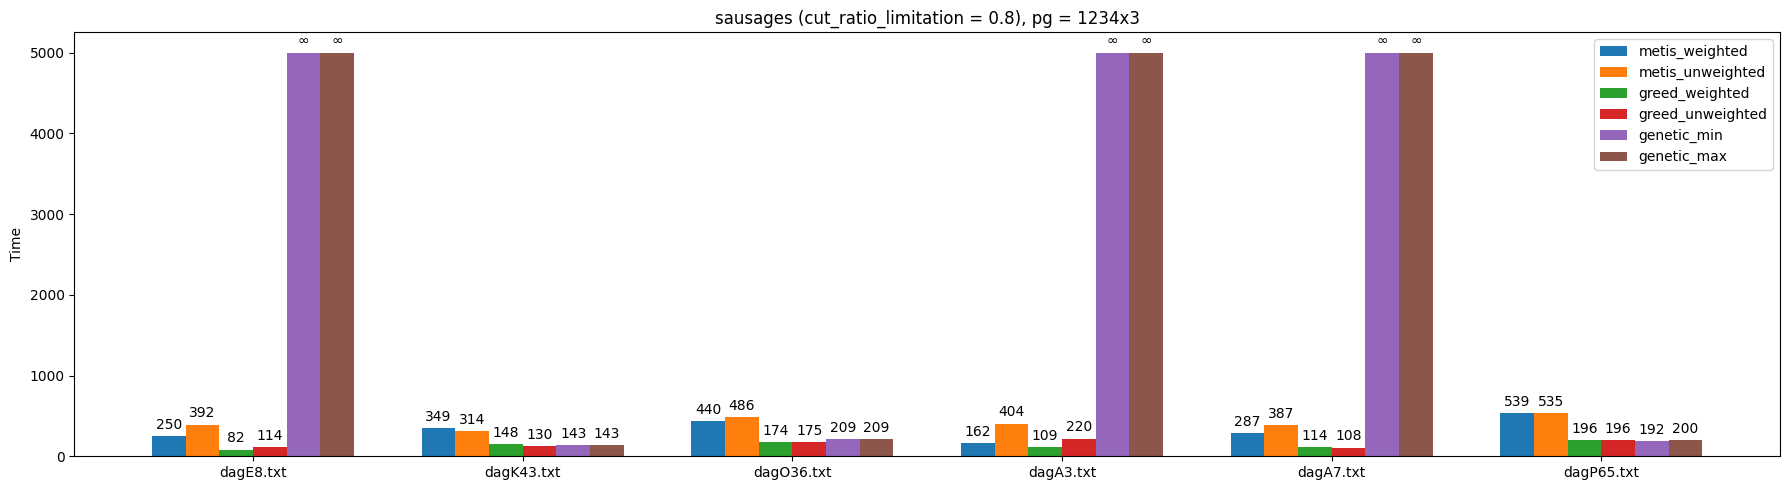

In [55]:
# data[data_name]['GAP'][graph_name][len(data[data_name]['GAP'][graph_name])] = [
#     graph, physical_graph, P_mut, ITER_MAX, cut_ratio, Penalty, cut_ratio_limitation, f, partition
# ]

# 
# 
# 
# 

# x = np.arange(len(names['sausages']))  # the label locations
data_name = 'sausages'
x_labels = []
cut_ratio_limitation = 0.8
physical_graph = '1234x3.txt'
BIG_NUMBER = 5000

greed_weighted = []
greed_unweighted = []
metis_weighted = []
metis_unweighted = []
genetic_min = []
genetic_max = []

for algorithm_name in data[data_name]:
    for graph_name in data[data_name][algorithm_name]:
        x_labels.append(graph_name)
    break

for algorithm_name in data[data_name]:
    if algorithm_name == 'greed_weighted':
        for graph_name in data[data_name][algorithm_name]:
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                # print(data[data_name][algorithm_name][graph_name][i], '<-')
                if cut_ratio_limitation in data[data_name][algorithm_name][graph_name][i] and\
                        physical_graph in data[data_name][algorithm_name][graph_name][i]:
                    greed_weighted.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
                    break
    elif algorithm_name == 'greed_unweighted':
        for graph_name in data[data_name][algorithm_name]:
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                # print
                if cut_ratio_limitation in data[data_name][algorithm_name][graph_name][i] and\
                        physical_graph in data[data_name][algorithm_name][graph_name][i]:
                    greed_unweighted.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
                    break
    elif algorithm_name == 'GAP':
        for graph_name in data[data_name][algorithm_name]:
            f_vals = []
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                if cut_ratio_limitation in data[data_name][algorithm_name][graph_name][i] and\
                        physical_graph in data[data_name][algorithm_name][graph_name][i]:
                    f_vals.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
            assert len(f_vals), (data_name, algorithm_name, graph_name)
            genetic_min.append(
                min(f_vals)
            )
            genetic_max.append(
                max(f_vals)
            )
    elif algorithm_name == 'metis_unweighted':
        for graph_name in data[data_name][algorithm_name]:
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                # print(data[data_name][algorithm_name][graph_name][i], '<-')
                if cut_ratio_limitation in data[data_name][algorithm_name][graph_name][i] and\
                        physical_graph in data[data_name][algorithm_name][graph_name][i]:
                    metis_unweighted.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
                    break
    elif algorithm_name == 'metis_weighted':
        for graph_name in data[data_name][algorithm_name]:
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                # print(data[data_name][algorithm_name][graph_name][i], '<-')
                if cut_ratio_limitation in data[data_name][algorithm_name][graph_name][i] and\
                        physical_graph in data[data_name][algorithm_name][graph_name][i]:
                    metis_weighted.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
                    break

f = lambda i: list(map(lambda x: min(BIG_NUMBER + 1, round(x)), i))
genetic_max = f(genetic_max)
genetic_min = f(genetic_min)
greed_weighted = f(greed_weighted)
greed_unweighted = f(greed_unweighted)
metis_weighted = f(metis_weighted)
metis_unweighted = f(metis_unweighted)

print(genetic_max)
print(genetic_min)
print(greed_weighted)
print(greed_unweighted)
print(metis_weighted)
print(metis_unweighted)


title = data_name + f' (cut_ratio_limitation = {cut_ratio_limitation}), pg = {physical_graph.split(".")[0]}'

width = 1.5  # the width of the bars
x = 12*np.arange(len(x_labels))  # the label locations


fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(len(x_labels)*3)
rects1 = ax.bar(x - 5*width/2, metis_weighted, width, label='metis_weighted')
rects2 = ax.bar(x - 3*width/2, metis_unweighted, width, label='metis_unweighted')
rects3 = ax.bar(x - width/2, greed_weighted, width, label='greed_weighted')
rects4 = ax.bar(x + width/2, greed_unweighted, width, label='greed_unweighted')
rects5 = ax.bar(x + 3*width/2, genetic_min, width, label='genetic_min')
rects6 = ax.bar(x + 5*width/2, genetic_max, width, label='genetic_max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time')
ax.set_title(title)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        # height.astype(int)
        # print(type(height))

        ax.annotate('{}'.format('∞' if height > BIG_NUMBER else height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

plt.show()

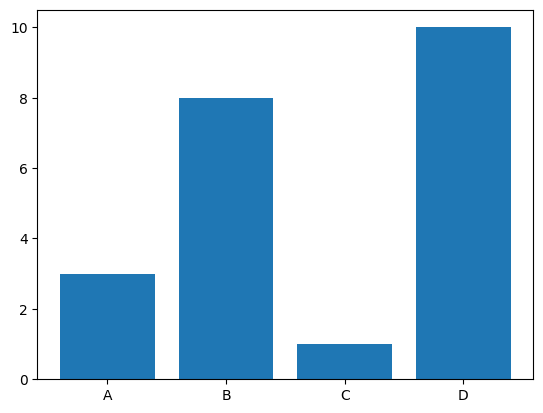

In [98]:
x = np.array(["A", "B", "C", "D"])
y = np.array([3, 8, 1, 10])

plt.bar(x,y)
plt.show()

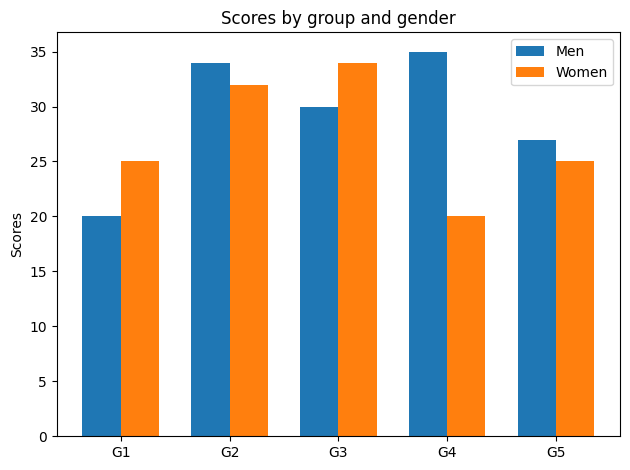

In [51]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

